In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('APU'))

print("Tensorflow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

if tf.config.list_physical_devices('GPU'):
    print("Running on GPU")
else:
    print("Running on CPU")

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[]
Tensorflow version: 2.10.0
Keras version: 2.10.0
Running on GPU


In [43]:
class DataScaling:
    def simple_features_scaling(self, pData):
        max = np.max(pData)
        
        return pData / max 
    
    def min_max_scaling(self, pData):
        min = np.min(pData)
        max = np.max(pData)

        return (pData - min) / (max - min)
    

class Normalization:
    def standardization(self, pData):
        std = np.std(pData)
        mean = np.mean(pData)

        return (pData - mean) / std
    
    def mean_normal(self, pData):
        mean = np.mean(pData)
        max = np.max(pData)
        min = np.min(pData)

        return (pData - mean) / (max - min)

    def box_cox_normal(self, pData):
        ...

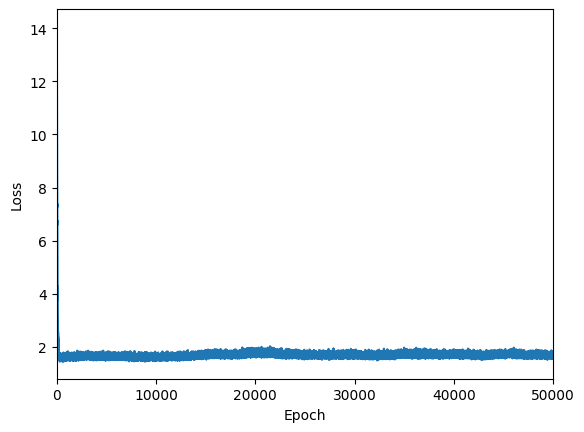

In [52]:
"""
    All vector on this class is transfer to column vector before put it into function
    This model use mini-batch gradient descent
"""
# This is implementation of Linear Regression for Gradient Descent
class LinearRegression:
    def __init__(self, n_features):
        # This variable stores all weights and biases
        self.weights = None

        # N features in dataset
        self.n_features = n_features

        # This variable saves all cost values which get by each loop 
        self.costs = []

        # Save loss for each loop
        self.losses = []
    
    def initialize_param(self):
        # Init the random value for weights and bias
        self.weights = np.random.randn(self.n_features + 1, 1)

    # Compute derivative value using gradient descent
    def gradient(self, py_hat, py, pX):
        return (2*(py_hat - py)*pX).reshape(self.n_features + 1, -1).mean(axis = 1, dtype= np.float32)
    
    # Update the weights using formular with parameters are learning rate, derivative of Loss function
    def update_weights(self, pLr, pGradient):
        self.weights = self.weights - pLr*pGradient
    
    # This function processes training the model using dataset
    def fit(self, pX_train, py_train, learning_rate = 0.01, epoch = 100, mini_batch = 90):
        # Each vector in pX_train is row vector
        # N is lenght of rows of pX_train
        N = pX_train.shape[0]
        self.initialize_param()
        temp_dataset = np.concatenate((pX_train, py_train), axis= 1)
        for e in range(epoch):
            costs = 0
            # Shuffle all dataset for the next training
            np.random.shuffle(temp_dataset)
            X_train = temp_dataset[:, :-1]
            y_train = temp_dataset[:, -1].reshape(-1,1)
            for i in range(0, N, mini_batch):
                # Extract x, y data from dataset for each loop
                x = X_train[i: i + mini_batch]
                y = y_train[i: i + mini_batch]

                y_hat = self.predict(x)
                
                # compute loss
                costs += self.compute_loss(y, y_hat)

                theta = self.gradient(y_hat, y, x)
                theta = theta.reshape(self.n_features + 1, -1)
                # Update weights
                self.update_weights(learning_rate, theta)
            
            # Append mean cost for each loop
            self.costs.append(np.sqrt(mini_batch / N * costs))
    # Predict the y value using model
    def predict(self, pX):
        # The pX is row vector
        
        return np.dot(pX, self.weights)
    
    # Plot the cost through each loop
    def plot_cost(self, pStart, pEnd):
        plt.figure()
        plt.plot(self.costs)
        plt.xlim(pStart, pEnd)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
    
    def get_losses(self):
        return self.losses
    
    def get_costs(self):
        return self.costs
    
    # Compute loss value once predict new value
    def compute_loss(self, py, py_hat):
        loss = np.mean(1.0 / 2 * (py - py_hat)**2, axis=0, dtype=np.float32)
        # print(loss)
        return loss

    def get_weights(self):
        return self.weights
    
    def evaluate_model(self, pX_test, py_test):
        N = pX_test.shape[0]

        loss = 0
        accuracy = 0
        for i in range(N):
            y_hat = self.predict(pX_test[i])
            loss += self.compute_loss(py_test[i], y_hat)
            print(self.compute_loss(py_test[i], y_hat))

        loss = np.sqrt(1.0 / N * loss)
        accuracy = 1 - loss
       
def pre_processing(pX, is_normalized=True):
    # Normalize the data with suitable value
    normalizer = Normalization()
    if is_normalized == True:
        pX = normalizer.mean_normal(pX)
    
    # Add one vector into X matrix
    pX = np.concatenate((np.ones((pX.shape[0],1)), pX), axis=1)

    return pX

df = pd.read_csv('data/advertising.csv')
dataset = df.to_numpy()
lr = 0.01
epoches = 50000
mini_batch = 70
is_splited = True
X_train = X_test = y_train = y_test = None
X = dataset[:, :-1]
y = dataset[:, -1].reshape(-1,1)

if is_splited == True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    X_train, y_train = X, y
    X_test = y_test = [] 

linear = LinearRegression(X_train.shape[1])

# Pre-processing X data
X_train = pre_processing(X_train, is_normalized=True)
# X_test = pre_processing(X_test)
linear.fit(X_train, y_train, learning_rate=lr, epoch=epoches, mini_batch=mini_batch)
linear.plot_cost(0, epoches)
# linear.evaluate_model(X_test, y_test)

In [51]:
df = pd.read_csv('data/or_problem.csv')
dataset = df.to_numpy()

X = dataset[:, :-1]
y = dataset[:, -1].reshape(-1,1)


linear.predict(pre_processing(np.array([0,1]).reshape(1,2), is_normalized=False))


array([[0.74980143]])